In [ ]:
# Installing torch_nightly and fastai 
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html  gwpy &> /dev/null
!pip install fastai  gwpy &> /dev/null

In [ ]:
# import libraries

from fastai import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os
from fastai.text import *

In [ ]:
dfTrain = pd.read_csv('/content/trainWithoutPreProcess.csv')
dfValidation = pd.read_csv('/content/validationWithoutPreProcess.csv')

In [ ]:
dfTrain = dfTrain.drop(columns=['id'])
dfTrain = dfTrain[["label", "tweet"]]
dfTrain.head()

,label,tweet
0,real,The CDC currently reports 99031 deaths. In gen...
1,real,States reported 1121 deaths a small rise from ...
2,fake,Politically Correct Woman (Almost) Uses Pandem...
3,real,#IndiaFightsCorona: We have 1524 #COVID testin...
4,real,Populous states can generate large case counts...


In [ ]:
dfValidation = dfValidation.drop(columns=['id'])
dfValidation = dfValidation[["label", "tweet"]]
dfValidation.head()

,label,tweet
0,fake,Chinese converting to Islam after realising th...
1,fake,11 out of 13 people (from the Diamond Princess...
2,fake,"COVID-19 Is Caused By A Bacterium, Not Virus A..."
3,fake,Mike Pence in RNC speech praises Donald Trump’...
4,real,6/10 Sky's @EdConwaySky explains the latest #C...


In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = dfTrain, valid_df = dfValidation, path = "")

In [ ]:
data_clas = TextClasDataBunch.from_df(train_df = dfTrain, valid_df = dfValidation, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
data_clas.show_batch()

text,target
"xxbos xxmaj xxunk "" xxmaj xxunk made in xxup us is the only medicine that can completely cure xxup covid-19 . \n xxmaj egyptian xxmaj health xxmaj minister arrive in xxmaj italy with secret coronavirus cure . \n xxmaj dr xxmaj charles xxmaj lieber a xxmaj harvard professor has been arrested in the xxup usa for manufacturing the coronavirus and selling it to xxmaj china . a video",fake
xxbos xxmaj man visited xxmaj albany xxup n.y. days before dying from coronavirus . ” \n a video ( allegedly ) of the xxmaj hospital das xxmaj clínicas xxmaj são xxmaj paulo . xxmaj it shows an empty waiting room . xxmaj the person filming says that the government is lying when it says there are xxup covid-19 patients in the hospital . \n xxup us state -,fake
"xxbos xxup covid-19 , xxmaj take one xxunk and read . xxmaj be understanding ! ! ! a xxmaj japanese doctor offers xxunk advise on preventing xxup covid-19 . xxmaj new coronavirus may not show symptoms for several days ( 14 - 27 days ) . xxmaj how can one know if the person is infected ? xxmaj by the time he has a fever and / or a cough",fake
"xxbos xxmaj please xxunk to your contacts in xxmaj india . xxmaj you never know who it may help . xxmaj tata xxmaj group has started good initiative , they are providing free doctors consultation online through xxunk . xxmaj this facility is started for you so that you need not to go out for doctors and you will be safe at home . \n \n xxmaj below is",fake
"xxbos xxmaj messed up with wrong person . xxmaj corona . xxmaj spitting on face xxmaj new \n xxmaj york , an islamic jihadi xxunk into a metro coach passenger just as the \n door xxunk . xxmaj unfortunately the low xxup xxunk jihadi picked on wrong person , he \n forced the train door open , xxunk the jihadi to xxunk and then made him \n",fake


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 4.37E-02


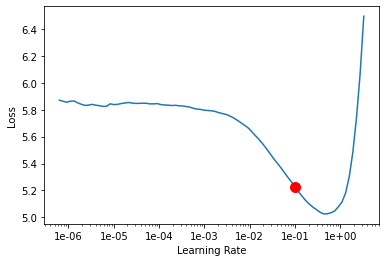

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.085616,3.507699,0.395480,09:50
1,3.326001,3.220638,0.427556,09:50


In [ ]:
# unfreezing weights and training the rest of the NN
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.609941,3.041836,0.453036,14:38
1,2.349800,3.040509,0.458694,14:35


In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6420 items)
x: TextList
xxbos xxmaj the xxup cdc currently reports xxunk deaths . xxmaj in general the xxunk in death counts between different sources are small and xxunk . xxmaj the death toll stands at roughly 1 xxrep 5 0 people today .,xxbos xxmaj states reported xxunk deaths a small rise from last xxmaj tuesday . xxmaj southern states reported xxunk of those deaths . https : / / t.co / xxunk,xxbos xxmaj politically xxmaj correct xxmaj woman ( xxmaj almost ) xxmaj uses xxmaj pandemic as xxmaj excuse xxmaj not to xxmaj xxunk xxmaj plastic xxmaj bag https : / / t.co / xxunk # coronavirus # nashville,xxbos # indiafightscorona : xxmaj we have xxunk # xxup covid testing laboratories in xxmaj india and as on 25th xxmaj august 2020 xxunk tests have been done : @profbhargava xxup dg xxup @icmrdelhi # staysafe # indiawillwin https : / / t.co / xxunk,xxbos xxmaj populous states can generate large case counts but if you look at the new case

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-01
Min loss divided by 10: 1.91E-03


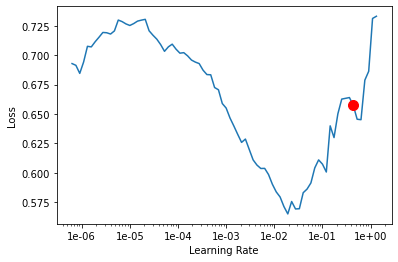

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.942296,0.538808,0.862150,08:20
1,0.543862,0.266700,0.892056,07:47


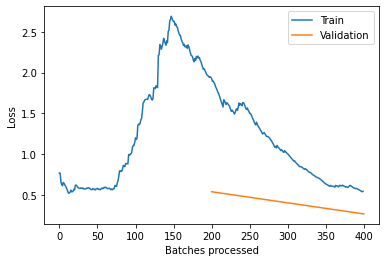

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.357448,0.199902,0.927103,09:17
1,0.324712,0.148787,0.941589,08:44
2,0.290114,0.135687,0.948131,09:28
3,0.250017,0.122798,0.952804,09:10


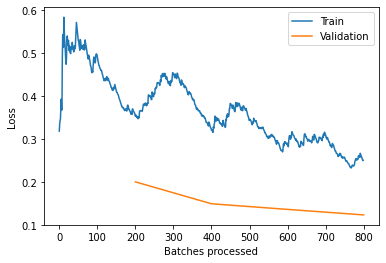

In [ ]:
learn.recorder.plot_losses()

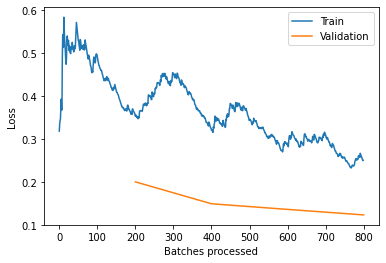

In [ ]:
learn.recorder.plot_losses()

In [ ]:
#this will take bht zyada time to issey kal krunga
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.235751,0.126266,0.958411,22:31
1,0.181263,0.099549,0.963084,23:43
2,0.133540,0.095335,0.965421,25:49
3,0.112732,0.098147,0.966355,24:45


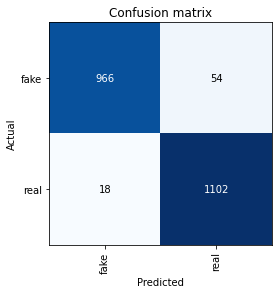

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [ ]:
dfTest = pd.read_csv('testWithoutPreProcess.csv')
dfTest.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [ ]:
predictions = []
for tweet in dfTest['tweet']:
  a, b, c = learn.predict(tweet)
  predictions.append(c)

In [ ]:
learn.predict("Last note: Washington DC's total test count fell by ~22% presumably pulling out antibody tests.")

(Category tensor(1), tensor(1), tensor([0.0097, 0.9903]))

In [ ]:
finalPred = []
for prediction in predictions:
  finalPred.append(prediction.numpy())

In [ ]:
i = 0
for pred in finalPred:
  if pred[0]>pred[1]:
    finalPred[i]='fake'
  else:
    finalPred[i]='real'
  i=i+1

In [ ]:
finalPred

['real',
 'fake',
 'fake',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'real',
 'real',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'fake',
 'real',
 'fake',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'real',
 'real',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'real',
 'fake',
 'real',
 'real',
 'real',
 'fake',
 'real',
 'real',
 'fake',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'real',
 'real',
 'fake',
 'fake',
 'real',
 'fake',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 

In [ ]:
finalSubmissionDataFrame = pd.DataFrame(data=finalPred, columns=['label'])

In [ ]:
finalSubmissionDataFrame.to_csv('submission.csv')

In [ ]:
learn.export()